## Wind Stress Curl Diagnostic Examples

The examples below illustrate how to use the stress curl diagnostic from within a Jupyter Notebook

In [1]:
%matplotlib inline

import om4labs
import xcompare
import cartopy.crs as ccrs

Fetch an empty `dictArgs` dictionary for the `stress_curl` diagnostic to use as a template.

In [2]:
dictArgs = om4labs.diags.stress_curl.parse(template=True)

Populate the `dictArgs` dictionary with the desired paths

In [3]:
experiment_root = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210308/CM4_piControl_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp"

dictArgs["static"] = f"{experiment_root}/ocean_annual/ocean_annual.static.nc"
dictArgs["ref_taux"] = f"{experiment_root}/ocean_annual/ts/annual/5yr/ocean_annual.0196-0200.tauuo.nc"
dictArgs["ref_tauy"] = f"{experiment_root}/ocean_annual/ts/annual/5yr/ocean_annual.0196-0200.tauvo.nc"
dictArgs["infile"] = [dictArgs["ref_taux"],dictArgs["ref_tauy"]]

Call the `read()` function for the diagnostic

In [4]:
ds_model, ds_ref_tau, ds_static = om4labs.diags.stress_curl.read(dictArgs)

Call the `calculate()` function for the diagnostic

In [6]:
results = om4labs.diags.stress_curl.calculate(ds_model, ds_ref_tau, ds_static, dictArgs)

/net/jpk/miniconda3/envs/python38/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/jpk/miniconda3/envs/python38/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/jpk/miniconda3/envs/python38/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/jpk/miniconda3/envs/python38/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)



## Plotting exaples

Here are three examples of how to use `xcompare` to plot the results that were generated above.  The first example shows the default plot format for `xcompare`:

/net/jpk/miniconda3/envs/python38/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/net/jpk/miniconda3/envs/python38/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


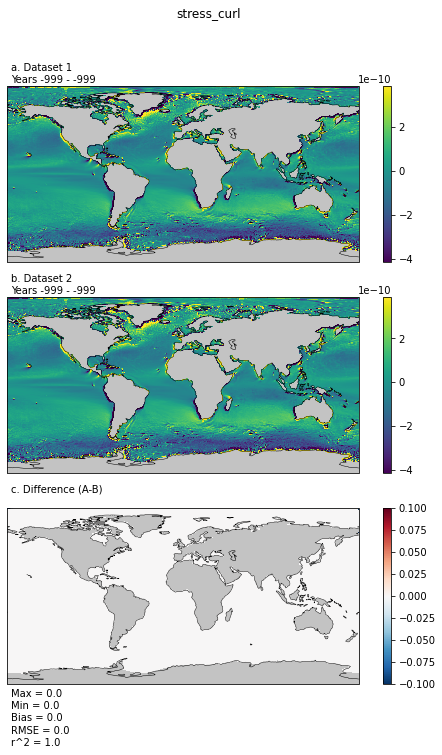

In [7]:
fig = xcompare.plot_three_panel(results,"stress_curl")

<br><br>
The second example is the same as above, except the `coastlines=False` option is passed:

/net/jpk/miniconda3/envs/python38/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


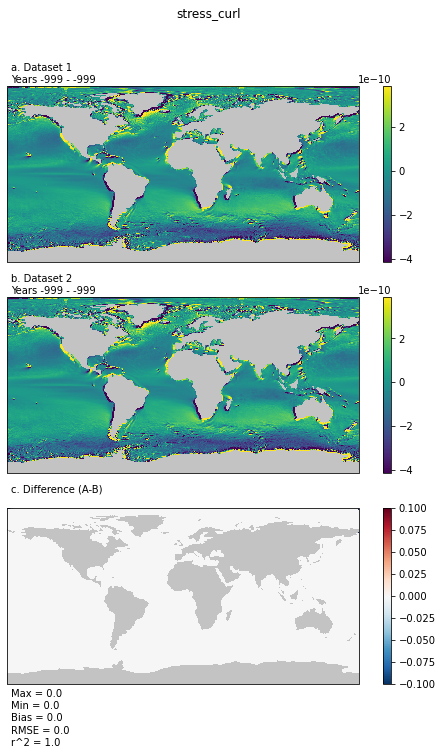

In [8]:
fig = xcompare.plot_three_panel(results,"stress_curl",coastlines=False)

<br><br>
The third example is the same as above, except the data are restricted to the Southern Ocean and the map projection is changed:

/net/jpk/miniconda3/envs/python38/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


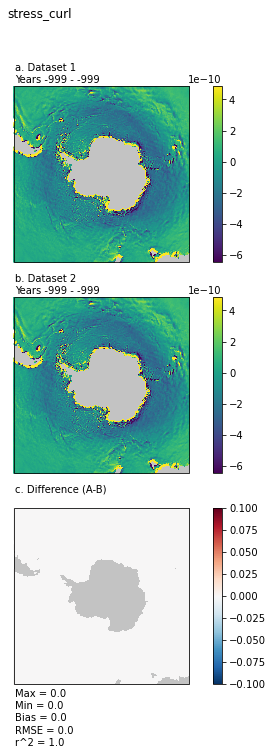

In [9]:
fig = xcompare.plot_three_panel(results,"stress_curl",coastlines=False,lat_range=(-90,-45),projection=ccrs.SouthPolarStereo())